In [1]:
import os
import h5py
import pandas as pd
from lbn import LBN, LBNLayer
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras import datasets, layers, models
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

### Checking the number of GPUs available in computer ###

In [3]:
physical_devices = tf.config.list_physical_devices('GPU') 
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [4]:
os.getcwd()

'C:\\Users\\hamde\\Desktop\\EPE_ML\\LBN\\train'

### Preprocessed Data ### 

In [22]:
h5f_X_train = h5py.File('../data/top-tagging/X_train.h5', 'r')
X_train = h5f_X_train['data'][:]
h5f_X_train.close()

h5f_y_train = h5py.File('../data/top-tagging/y_train.h5', 'r')
y_train = h5f_y_train['data'][:]
h5f_y_train.close()

h5f_X_test = h5py.File('../data/top-tagging/X_test.h5', 'r')
X_test = h5f_X_test['data'][:]
h5f_X_test.close()

h5f_y_test = h5py.File('../data/top-tagging/y_test.h5', 'r')
y_test = h5f_y_test['data'][:]
h5f_y_test.close()


In [2]:
f = pd.read_hdf('../data/top-tagging/test.h5','table')

In [9]:
f

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,...,E_199,PX_199,PY_199,PZ_199,truthE,truthPX,truthPY,truthPZ,ttv,is_signal_new
436,218.364243,-172.341858,110.129105,-76.503624,153.661118,-111.320465,93.167969,-50.390713,76.708054,-56.523701,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,0
440,122.238762,26.738468,-91.613998,76.382225,121.227135,17.644758,-93.015450,75.715302,90.420105,21.377417,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,0
441,383.772308,-97.906456,79.640709,-362.426361,200.625992,-54.921326,37.994343,-189.184753,123.247223,-33.828953,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,0
444,132.492752,-77.763947,-87.322601,-62.304600,83.946594,-49.450481,-53.823605,-41.288010,28.072624,-19.964916,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,0
445,730.786987,-209.120010,-193.454315,-672.973877,225.477325,-75.363350,-66.226990,-201.926651,217.040192,-63.698189,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,169.716614,-122.102844,36.656090,112.031059,112.158615,-80.692657,24.224476,74.036636,86.687820,-60.876274,...,0.0,0.0,0.0,0.0,832.899963,-572.147461,249.778381,524.242310,1,1
822,287.591492,-81.565056,-140.493576,237.313202,160.357544,-34.246628,-88.843933,129.028931,105.006508,-30.313942,...,0.0,0.0,0.0,0.0,1014.205322,-213.806396,-476.465851,852.417358,1,1
824,91.996681,60.538616,-63.476665,27.734055,93.122139,60.690456,-61.697636,34.377369,67.617706,33.402180,...,0.0,0.0,0.0,0.0,659.905701,419.718506,-414.999115,239.802658,1,1
825,132.474686,35.062359,125.736656,22.593466,61.466259,7.588309,55.307018,25.722607,53.369095,17.563345,...,0.0,0.0,0.0,0.0,659.797302,39.736858,593.325745,230.296585,1,1


In [4]:
len(f)

404000

In [5]:
h5f_X_test = h5py.File('../data/top-tagging/X_test.h5', 'r')
X_test = h5f_X_test['data'][:]

In [8]:
X_test

array([[[ 218.36424   , -172.34186   ,  110.129105  ,  -76.503624  ],
        [ 153.66112   , -111.320465  ,   93.16797   ,  -50.390713  ],
        [  76.70805   ,  -56.5237    ,   46.127293  ,  -23.695349  ],
        ...,
        [   3.7996545 ,   -2.7090824 ,    2.5125492 ,   -0.88619643],
        [   1.9909239 ,   -1.2058619 ,    1.2122197 ,   -1.019901  ],
        [   1.703202  ,   -1.2451894 ,    1.0461328 ,   -0.50597095]],

       [[ 122.23876   ,   26.738468  ,  -91.614     ,   76.382225  ],
        [ 121.227135  ,   17.644758  ,  -93.01545   ,   75.7153    ],
        [  90.420105  ,   21.377417  ,  -68.01097   ,   55.61753   ],
        ...,
        [  16.835169  ,    3.7185302 ,  -12.637291  ,   10.483048  ],
        [  15.485752  ,    3.5555873 ,  -11.694834  ,    9.507743  ],
        [  13.516031  ,    2.916837  ,  -10.497039  ,    7.999209  ]],

       [[ 383.7723    ,  -97.906456  ,   79.64071   , -362.42636   ],
        [ 200.62599   ,  -54.921326  ,   37.994343  , -189.1

In [7]:
X_test.shape

(404000, 13, 4)

### Building Model ###

In [23]:
input_shape = (13,4)

inputs = keras.Input(shape=input_shape)

x = LBNLayer(input_shape, 13, boost_mode=LBN.PAIRS, features=["E", "pt", "eta", "phi", "m", "pair_cos"])(inputs)

x = Dense(1024, kernel_initializer='lecun_uniform', kernel_regularizer='l2', activation='elu', name='fc1_elu')(x)
x = BatchNormalization()(x)
x = Dense(1024, kernel_initializer='lecun_uniform', kernel_regularizer='l2', activation='elu', name='fc2_elu')(x)
x = BatchNormalization()(x)
x = Dense(1024, kernel_initializer='lecun_uniform', kernel_regularizer='l2', activation='elu', name='fc3_elu')(x)
x = BatchNormalization()(x)
x = Dense(1024, kernel_initializer='lecun_uniform', kernel_regularizer='l2', activation='elu', name='fc4_elu')(x)
x = BatchNormalization()(x)
x = Dense(1024, kernel_initializer='lecun_uniform', kernel_regularizer='l2', activation='elu', name='fc5_elu')(x)
x = BatchNormalization()(x)
x = Dense(1024, kernel_initializer='lecun_uniform', kernel_regularizer='l2', activation='elu', name='fc6_elu')(x)
x = BatchNormalization()(x)
x = Dense(1024, kernel_initializer='lecun_uniform', kernel_regularizer='l2', activation='elu', name='fc7_elu')(x)
x = BatchNormalization()(x)
x = Dense(1024, kernel_initializer='lecun_uniform', kernel_regularizer='l2', activation='elu', name='fc8_elu')(x)
x = BatchNormalization()(x)
outputs = Dense(1, kernel_initializer='lecun_uniform', kernel_regularizer='l2', activation='sigmoid', name='output_sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="lbn-zenodo")

In [24]:
adam = Adam(lr=0.00001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()


Model: "lbn-zenodo"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 13, 4)]           0         
_________________________________________________________________
LBN (LBNLayer)               (None, 143)               338       
_________________________________________________________________
fc1_elu (Dense)              (None, 1024)              147456    
_________________________________________________________________
batch_normalization_16 (Batc (None, 1024)              4096      
_________________________________________________________________
fc2_elu (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_17 (Batc (None, 1024)              4096      
_________________________________________________________________
fc3_elu (Dense)              (None, 1024)              1

In [26]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 15, 
                    validation_split = 0.1, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Train on 1089900 samples, validate on 121100 samples
Epoch 1/15
1089900/1089900 [==============================] - 56s 51us/sample - loss: 66.1235 - accuracy: 0.8868 - val_loss: 51.6042 - val_accuracy: 0.8934
Epoch 2/15
1089900/1089900 [==============================] - 47s 43us/sample - loss: 40.8782 - accuracy: 0.8933 - val_loss: 31.6953 - val_accuracy: 0.8944
Epoch 3/15
1089900/1089900 [==============================] - 47s 43us/sample - loss: 25.0817 - accuracy: 0.8952 - val_loss: 19.4725 - val_accuracy: 0.8955
Epoch 4/15
1089900/1089900 [==============================] - 47s 44us/sample - loss: 15.4981 - accuracy: 0.8960 - val_loss: 12.1505 - val_accuracy: 0.8966
Epoch 5/15
1089900/1089900 [==============================] - 48s 44us/sample - loss: 9.7890 - accuracy: 0.8962 - val_loss: 7.7959 - val_accuracy: 0.8971
Epoch 6/15
1089900/1089900 [==============================] - 48s 44us/sample - loss: 6.3800 - accuracy: 0.8963 - val_loss: 5.1749 - val_accuracy: 0.8954
Epoch 7/15
1089

In [3]:
import matplotlib.pyplot as plt
def learningCurve(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], linewidth=1)
    plt.plot(history.history['val_loss'], linewidth=1)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    plt.savefig('zenodo-l2_learning_curve.pdf')
    plt.show()
    plt.close()

In [4]:
learningCurve(history)

NameError: name 'history' is not defined

In [ ]:
labels_pred = model.predict(X_test)

In [ ]:

def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model.predict(features_val)
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))       
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = labels_pred[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'LBN ROC Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

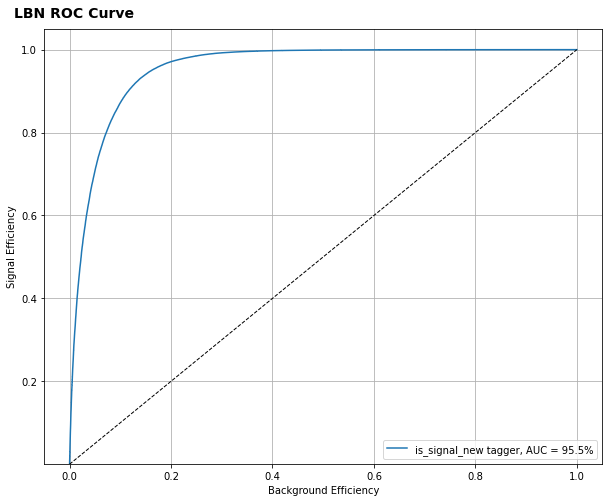

In [16]:
y_pred = makeRoc(X_test, y_test, ['is_signal_new'], model, outputSuffix='lbn-zenodo-l2')
